In [2]:
import pandas as pd
import logging
from datetime import datetime
import csv
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns

GSE249290 is looking at gene expression and cell confluency in a few cell lines. One of these is A375, which is used in the CRISPR screens. 

Each gene has several expression values (replicates and confluency) already normalized to TPM. I would like to scale this down to one number. 

1. read data into a dataframe.
2. calculate the per row mean, median and std. dev.
3. plot values to decide if you can just take the mean 
4. Write data to a file

In [3]:
infile='../data/raw/GSE249290_gene_counts_scaled_confluence.tsv'

df=pd.read_csv(infile, delimiter='\t')
display(df.head())

,gene_id,VE.3295.A375Over1_S10,VE.3295.A375Over2_S11,VE.3295.A375Over3_S12,VE.3295.A375SubWt1_S7,VE.3295.A375SubWt2_S8,VE.3295.A375SubWt3_S9,VE.3295.HekOver1_S4,VE.3295.HekOver2_S5,VE.3295.HekOver3_S6,VE.3295.HekSub1_S1,VE.3295.HekSub2_S2,VE.3295.HekSub3_S3,VE.3295.SHOver1_S16,VE.3295.SHOver2_S17,VE.3295.SHOver3_S18,VE.3295.SHSubWt1_S13,VE.3295.SHSubWt2_S14,VE.3295.SHSubWt3_S15
0,A1BG,123.097694,112.911626,86.576307,41.172549,63.249828,41.893863,24.556101,44.671696,43.802938,22.088264,26.125054,31.424494,6.533269,35.340200,110.886207,36.879669,26.859032,47.948513
1,A1BG-AS1,822.407380,576.795125,485.453843,286.558225,331.309191,225.780091,118.862316,107.796278,113.444780,156.738026,252.091030,183.571057,6.876471,68.980813,130.192328,71.336112,80.936878,84.529124
2,A1CF,0.771065,0.000000,0.246467,0.000000,0.000000,0.000000,0.309634,0.254122,0.093148,0.131335,0.132441,0.000000,0.000000,0.000000,0.112940,0.000000,0.000000,0.000000
3,A2M,48.242606,29.896881,24.394566,3.392531,8.374399,3.886541,0.628248,0.171834,0.378037,0.799409,0.268690,0.000000,0.456109,0.724684,2.063512,0.293724,2.056853,3.829063
4,A2M-AS1,9.975641,6.168947,2.288422,0.635403,1.821232,0.672568,49.469392,37.857087,46.788798,48.540470,68.909447,61.184908,2.054592,8.712966,21.157444,13.196357,23.118309,19.198812


In [4]:
df.shape

(29744, 19)

In [5]:
df['mean'] = df.iloc[:, 1:].mean(axis=1)
df['median'] = df.iloc[:, 1:].median(axis=1)
df['std_dev'] = df.iloc[:, 1:].std(axis=1)

display(df.head())

,gene_id,VE.3295.A375Over1_S10,VE.3295.A375Over2_S11,VE.3295.A375Over3_S12,VE.3295.A375SubWt1_S7,VE.3295.A375SubWt2_S8,VE.3295.A375SubWt3_S9,VE.3295.HekOver1_S4,VE.3295.HekOver2_S5,VE.3295.HekOver3_S6,...,VE.3295.HekSub3_S3,VE.3295.SHOver1_S16,VE.3295.SHOver2_S17,VE.3295.SHOver3_S18,VE.3295.SHSubWt1_S13,VE.3295.SHSubWt2_S14,VE.3295.SHSubWt3_S15,mean,median,std_dev
0,A1BG,123.097694,112.911626,86.576307,41.172549,63.249828,41.893863,24.556101,44.671696,43.802938,...,31.424494,6.533269,35.340200,110.886207,36.879669,26.859032,47.948513,51.445406,41.893863,32.394602
1,A1BG-AS1,822.407380,576.795125,485.453843,286.558225,331.309191,225.780091,118.862316,107.796278,113.444780,...,183.571057,6.876471,68.980813,130.192328,71.336112,80.936878,84.529124,227.981059,156.738026,199.711470
2,A1CF,0.771065,0.000000,0.246467,0.000000,0.000000,0.000000,0.309634,0.254122,0.093148,...,0.000000,0.000000,0.000000,0.112940,0.000000,0.000000,0.000000,0.113953,0.000000,0.185041
3,A2M,48.242606,29.896881,24.394566,3.392531,8.374399,3.886541,0.628248,0.171834,0.378037,...,0.000000,0.456109,0.724684,2.063512,0.293724,2.056853,3.829063,7.214316,2.056853,12.621402
4,A2M-AS1,9.975641,6.168947,2.288422,0.635403,1.821232,0.672568,49.469392,37.857087,46.788798,...,61.184908,2.054592,8.712966,21.157444,13.196357,23.118309,19.198812,23.430600,19.198812,21.527143


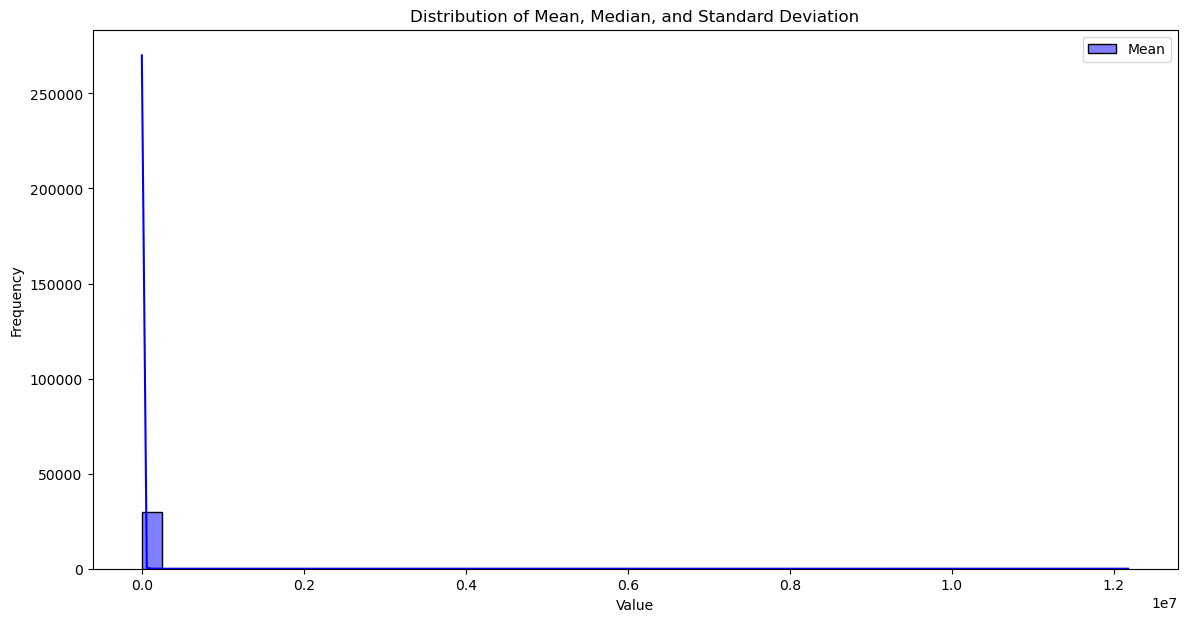

In [7]:
plt.figure(figsize=(14, 7))

# Plot mean
sns.histplot(df['mean'], kde=True, color='blue', label='Mean', bins=50)

plt.legend()
plt.title('Distribution of Mean, Median, and Standard Deviation')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

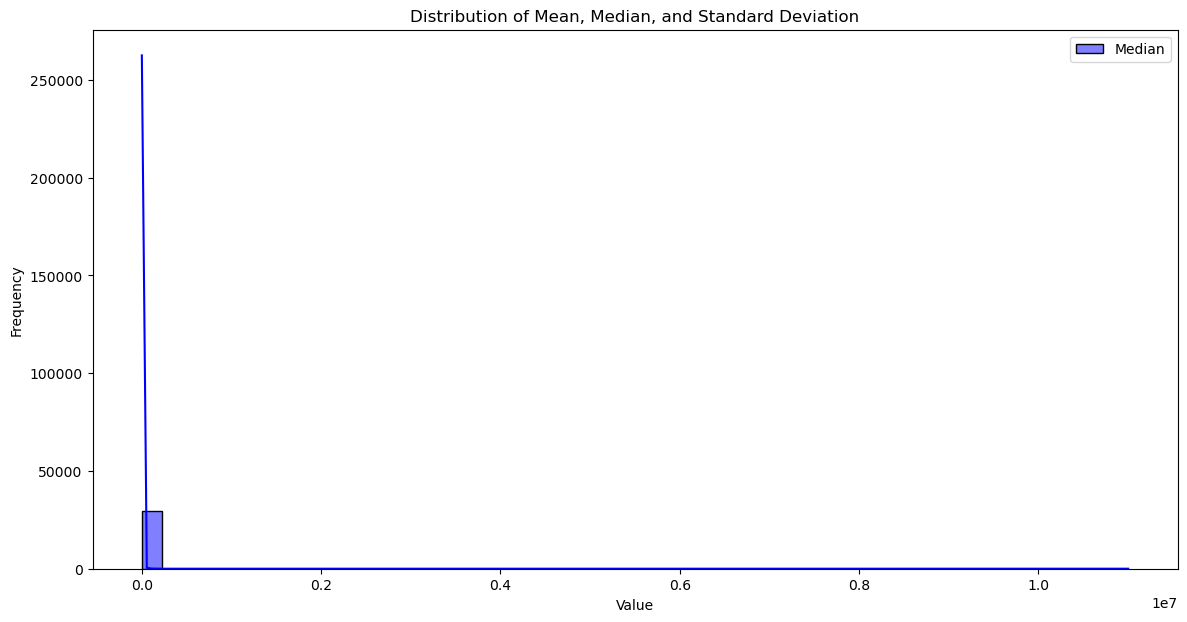

In [8]:
plt.figure(figsize=(14, 7))

# Plot mean
sns.histplot(df['median'], kde=True, color='blue', label='Median', bins=50)

plt.legend()
plt.title('Distribution of Mean, Median, and Standard Deviation')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

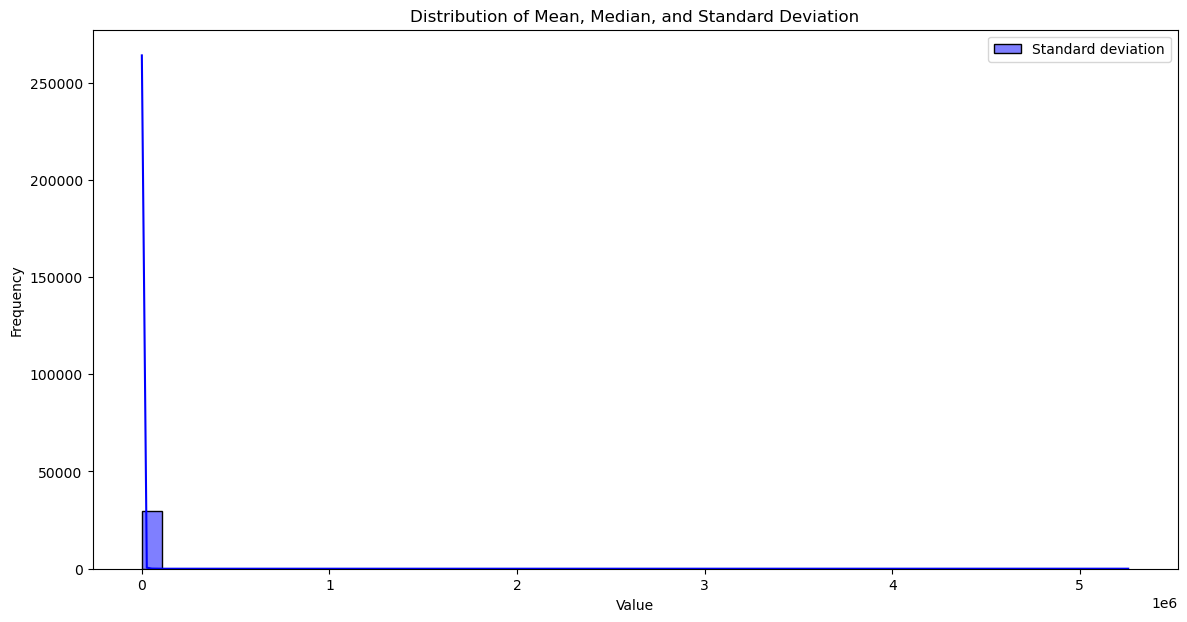

In [10]:
plt.figure(figsize=(14, 7))

# Plot mean
sns.histplot(df['std_dev'], kde=True, color='blue', label='Standard deviation', bins=50)

plt.legend()
plt.title('Distribution of Mean, Median, and Standard Deviation')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

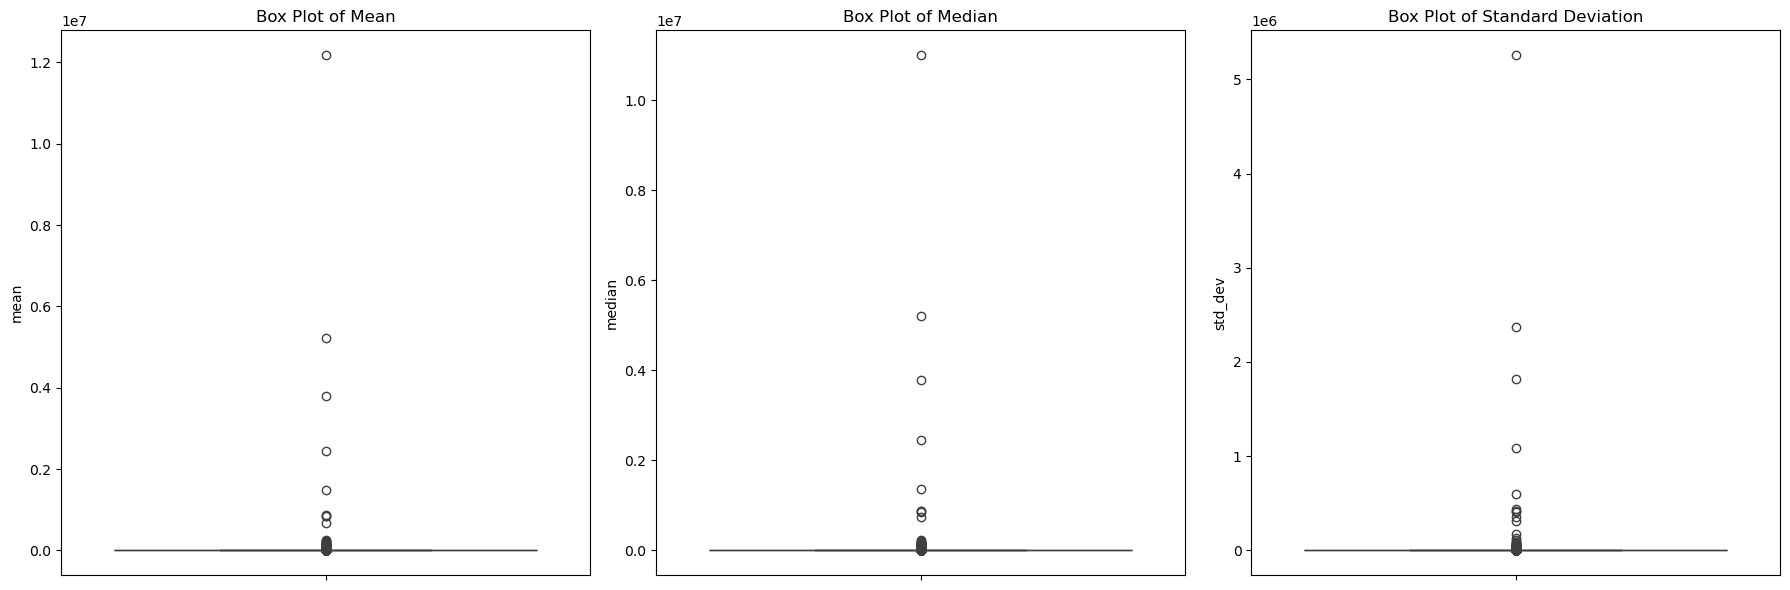

In [11]:
plt.figure(figsize=(18, 6))

# Box plot for mean
plt.subplot(1, 3, 1)
sns.boxplot(y=df['mean'])
plt.title('Box Plot of Mean')

# Box plot for median
plt.subplot(1, 3, 2)
sns.boxplot(y=df['median'])
plt.title('Box Plot of Median')

# Box plot for standard deviation
plt.subplot(1, 3, 3)
sns.boxplot(y=df['std_dev'])
plt.title('Box Plot of Standard Deviation')

plt.tight_layout()
plt.show()

OK- these plots are unsurprising- most things are down in the low expression bin, with a few things that are highly expressed, or change value as confluency changes. 

I think I'll just use the mean for all of these. For most things this will likely be good enough for now. 

In [12]:
df_selected = df[['gene_id', 'mean', 'median', 'std_dev']]
display(df_selected.head())

,gene_id,mean,median,std_dev
0,A1BG,51.445406,41.893863,32.394602
1,A1BG-AS1,227.981059,156.738026,199.711470
2,A1CF,0.113953,0.000000,0.185041
3,A2M,7.214316,2.056853,12.621402
4,A2M-AS1,23.430600,19.198812,21.527143


In [13]:
output_file = '../data/processed/GSE249290_gene_counts_selected.csv'
df_selected.to_csv(output_file, index=False)